# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
city_df = pd.DataFrame({'City':cities, 'Lat':'','Lng':'','Max Temp':'', 'Humidity':'', 'Cloudiness':'', 'Wind Speed':'', 'Country':'', 'Date':''})
city_df = city_df.set_index(['City'])

#Only run once! Skip this step if re-running code

for c in cities:
    if c == cities[0]:
        print('Beginning Data Retrieval\n--------------------------')
    try:
        city_df.loc[c] = [requests.get(f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q={c}").json()['coord']['lat'],
                         requests.get(f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q={c}").json()['coord']['lon'],
                         requests.get(f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q={c}").json()['main']['temp_max'],
                         requests.get(f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q={c}").json()['main']['humidity'],
                         requests.get(f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q={c}").json()['clouds']['all'],
                         requests.get(f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q={c}").json()['wind']['speed'],
                         requests.get(f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q={c}").json()['sys']['country'],
                         requests.get(f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q={c}").json()['dt']]
        print(f'Collecting data for {c}')
    except KeyError:
        print(f'No Data for {c}: city not found')
        city_df.loc[c] = [None] * 8    
    time.sleep(2)
    
    

Beginning Data Retrieval
--------------------------
No Data for grand river south east: city not found
No Data for taolanaro: city not found
No Data for illoqqortoormiut: city not found
No Data for karakendzha: city not found
No Data for barentsburg: city not found
No Data for nizhneyansk: city not found
No Data for cockburn harbour: city not found
No Data for ruian: city not found
No Data for belushya guba: city not found
No Data for tabiauea: city not found
No Data for mys shmidta: city not found
No Data for acuna: city not found
No Data for ardistan: city not found
No Data for jabiru: city not found
No Data for amderma: city not found
No Data for vaitupu: city not found
No Data for chagda: city not found
No Data for sentyabrskiy: city not found
No Data for unye: city not found
No Data for marcona: city not found
No Data for attawapiskat: city not found
No Data for saleaula: city not found
No Data for saryshagan: city not found
No Data for ambodifototra: city not found
No Data for sa

In [2]:
#Run this code if you skipped the previous step
city_df = pd.read_csv('Data/city_df.csv')

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
city_df.to_csv('Data/city_df.csv')
city_df.head(5)

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,
hermanus,-34.4187,19.2345,11.94,79,7,7.42,ZA,1661545392
savonlinna,61.8699,28.88,14.03,100,75,0.51,FI,1661545393
vaini,-21.2,-175.2,25.09,88,20,3.6,TO,1661545395
alofi,-19.0595,-169.9187,24.94,69,40,6.69,NU,1661545440
georgetown,5.4112,100.3354,27.96,87,20,2.06,MY,1661545277


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [3]:
city_df_stats = city_df.agg(['mean','median','max','min'])
display(city_df_stats)

/var/folders/hl/hq5d39rj61s65dfk1rmq7z1c0000gn/T/ipykernel_6705/2783984024.py:1: FutureWarning: ['City', 'Country'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  city_df_stats = city_df.agg(['mean','median','max','min'])


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
mean,NaN,20.066105,16.524755,20.505974,71.446266,55.269581,3.456284,1.661546e+09
median,NaN,25.519800,18.607100,21.990000,76.000000,66.000000,2.980000,1.661546e+09
max,zyryanka,78.218600,178.416700,37.510000,100.000000,100.000000,14.920000,1.661547e+09
min,aadorf,-54.800000,-179.166700,-0.040000,13.000000,0.000000,0.000000,1.661545e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

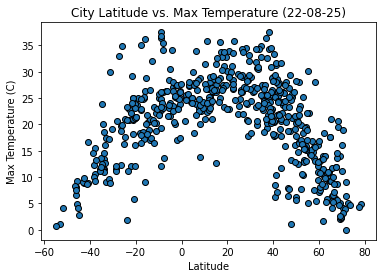

In [4]:
plt.scatter(city_df.Lat, city_df['Max Temp'], edgecolors='black')
plt.title('City Latitude vs. Max Temperature (22-08-25)')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.show()

## Latitude vs. Humidity Plot

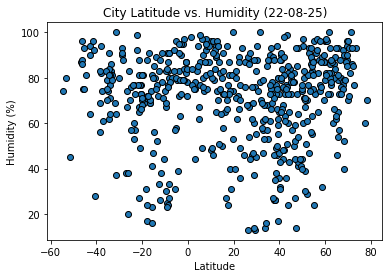

In [5]:
plt.scatter(city_df.Lat, city_df['Humidity'], edgecolors='black')
plt.title('City Latitude vs. Humidity (22-08-25)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.show()

## Latitude vs. Cloudiness Plot

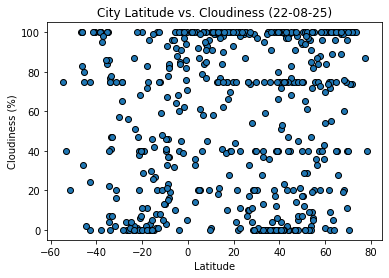

In [6]:
plt.scatter(city_df.Lat, city_df['Cloudiness'], edgecolors='black')
plt.title('City Latitude vs. Cloudiness (22-08-25)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.show()

## Latitude vs. Wind Speed Plot

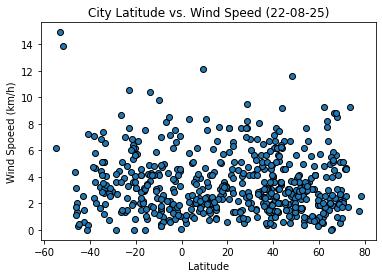

In [7]:
plt.scatter(city_df.Lat, city_df['Wind Speed'], edgecolors='black')
plt.title('City Latitude vs. Wind Speed (22-08-25)')
plt.ylabel('Wind Spoeed (km/h)')
plt.xlabel('Latitude')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

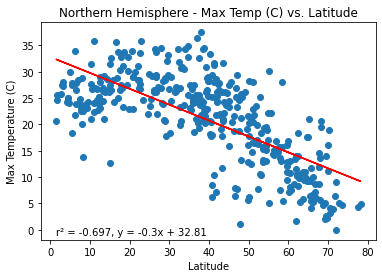

The r²-value is -0.697, with a P-value < 0.001. Latitude and Max Temperature in the Northern Hemisphere is correlated. As Latitude increases, Max temperature decreases at a rate of 0.3


In [61]:
latitude_data = city_df[city_df['Lat'] >= 0]['Lat']
y_data = city_df[city_df['Lat'] >= 0]['Max Temp']
linreg = st.linregress(latitude_data, y_data)
plt.scatter(latitude_data, y_data)
plt.plot(latitude_data, latitude_data*linreg[0]+linreg[1], color = 'red')
plt.text(min(latitude_data), min(y_data)-1,f'r\u00B2 = {round(linreg[2],3)}, y = {round(linreg[0],2)}x + {round(linreg[1],2)}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Northern Hemisphere - Max Temp (C) vs. Latitude')
plt.show()
print(f'The r\u00B2-value is {round(linreg[2],3)}, with a P-value < 0.001. Latitude and Max Temperature in the Northern Hemisphere is correlated. As Latitude increases, Max temperature decreases at a rate of 0.3')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

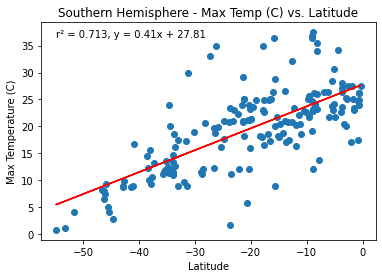

The r²-value is 0.713, with a P-value < 0.001. Latitude and Max Temperature in the Northern Hemisphere is not correlated


In [59]:
latitude_data = city_df[city_df['Lat'] < 0]['Lat']
y_data = city_df[city_df['Lat'] < 0]['Max Temp']
linreg = st.linregress(latitude_data, y_data)
plt.scatter(latitude_data, y_data)
plt.plot(latitude_data, latitude_data*linreg[0]+linreg[1], color = 'red')
plt.text(min(latitude_data), max(y_data)-1,f'r\u00B2 = {round(linreg[2],3)}, y = {round(linreg[0],2)}x + {round(linreg[1],2)}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Southern Hemisphere - Max Temp (C) vs. Latitude')
plt.show()
print(f'The r\u00B2-value is {round(linreg[2],3)}, with a P-value < 0.001. Latitude and Max Temperature in the Northern Hemisphere is correlated. As Latitude increases, Max temperature increases at a rate of 0.41')


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

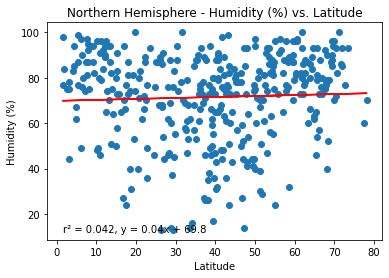

The r²-value is 0.042, with a P-value of 0.418. Latitude and Humidity in the Northern Hemisphere is not correlated


In [57]:
latitude_data = city_df[city_df['Lat'] >= 0]['Lat']
y_data = city_df[city_df['Lat'] >= 0]['Humidity']
linreg = st.linregress(latitude_data, y_data)
plt.scatter(latitude_data, y_data)
plt.plot(latitude_data, latitude_data*linreg[0]+linreg[1], color = 'red')
plt.text(min(latitude_data), min(y_data)-1,f'r\u00B2 = {round(linreg[2],3)}, y = {round(linreg[0],2)}x + {round(linreg[1],2)}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
plt.show()
print(f'The r\u00B2-value is {round(linreg[2],3)}, with a P-value of {round(linreg[3],3)}. Latitude and Humidity in the Northern Hemisphere is not correlated')


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

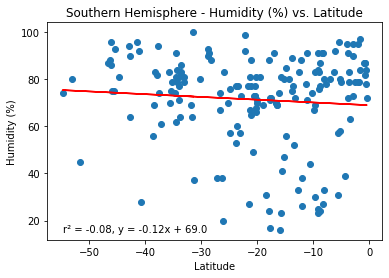

The r²-value is -0.08, with a P-value of 0.294. Latitude and Cloudiness in the Southern Hemisphere is not correlated


In [56]:
latitude_data = city_df[city_df['Lat'] < 0]['Lat']
y_data = city_df[city_df['Lat'] < 0]['Humidity']
linreg = st.linregress(latitude_data, y_data)
plt.scatter(latitude_data, y_data)
plt.plot(latitude_data, latitude_data*linreg[0]+linreg[1], color = 'red')
plt.text(min(latitude_data), min(y_data)-1,f'r\u00B2 = {round(linreg[2],3)}, y = {round(linreg[0],2)}x + {round(linreg[1],2)}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.show()
print(f'The r\u00B2-value is {round(linreg[2],3)}, with a P-value of {round(linreg[3],3)}. Latitude and Humidity in the Southern Hemisphere is not correlated')


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

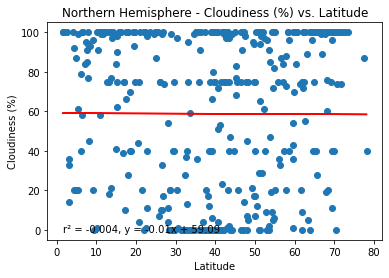

The r²-value is -0.004, with a P-value of 0.936. Latitude and Cloudiness in the Northern Hemisphere is not correlated


In [55]:
latitude_data = city_df[city_df['Lat'] >= 0]['Lat']
y_data = city_df[city_df['Lat'] >= 0]['Cloudiness']
linreg = st.linregress(latitude_data, y_data)
plt.scatter(latitude_data, y_data)
plt.plot(latitude_data, latitude_data*linreg[0]+linreg[1], color = 'red')
plt.text(min(latitude_data), min(y_data)-1,f'r\u00B2 = {round(linreg[2],3)}, y = {round(linreg[0],2)}x + {round(linreg[1],2)}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.show()
print(f'The r\u00B2-value is {round(linreg[2],3)}, with a P-value of {round(linreg[3],3)}. Latitude and Cloudiness in the Northern Hemisphere is not correlated')


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

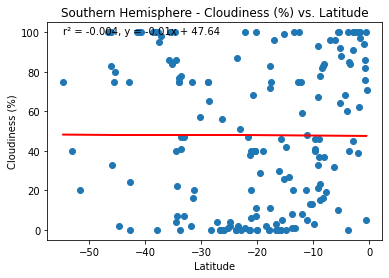

The r²-value is -0.004, with a P-value of 0.959. Latitude and windspeed in the Northern Hemisphere is not correlated


In [53]:
latitude_data = city_df[city_df['Lat'] < 0]['Lat']
y_data = city_df[city_df['Lat'] < 0]['Cloudiness']
linreg = st.linregress(latitude_data, y_data)
plt.scatter(latitude_data, y_data)
plt.plot(latitude_data, latitude_data*linreg[0]+linreg[1], color = 'red')
plt.text(min(latitude_data), max(y_data)-1,f'r\u00B2 = {round(linreg[2],3)}, y = {round(linreg[0],2)}x + {round(linreg[1],2)}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.show()
print(f'The r\u00B2-value is {round(linreg[2],3)}, with a P-value of {round(linreg[3],3)}. Latitude and Cloudiness in the Southern Hemisphere is not correlated')



####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

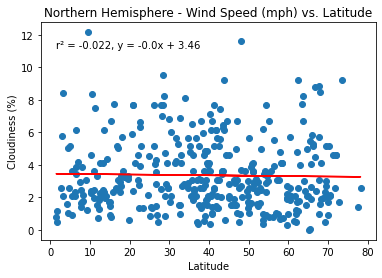

The r²-value is -0.022, with a P-value of 0.666. Latitude and windspeed in the Southern Hemisphere is not correlated


In [52]:
latitude_data = city_df[city_df['Lat'] >= 0]['Lat']
y_data = city_df[city_df['Lat'] >= 0]['Wind Speed']
linreg = st.linregress(latitude_data, y_data)
plt.scatter(latitude_data, y_data)
plt.plot(latitude_data, latitude_data*linreg[0]+linreg[1], color = 'red')
plt.text(min(latitude_data), max(y_data)-1,f'r\u00B2 = {round(linreg[2],3)}, y = {round(linreg[0],2)}x + {round(linreg[1],2)}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.show()
print(f'The r\u00B2-value is {round(linreg[2],3)}, with a P-value of {round(linreg[3],3)}. Latitude and windspeed in the Northern Hemisphere is not correlated')


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

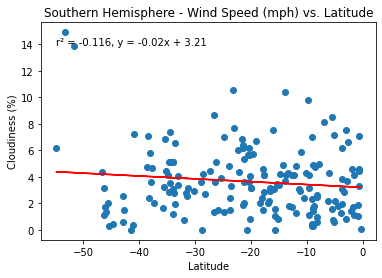

The r²-value is -0.116, with a P-value of 0.127. Latitude and windspeed in the Southern Hemisphere is not correlated


In [51]:
latitude_data = city_df[city_df['Lat'] < 0]['Lat']
y_data = city_df[city_df['Lat'] < 0]['Wind Speed']
linreg = st.linregress(latitude_data, y_data)
plt.scatter(latitude_data, y_data)
plt.plot(latitude_data, latitude_data*linreg[0]+linreg[1], color = 'red')
plt.text(min(latitude_data), max(y_data)-1,f'r\u00B2 = {round(linreg[2],3)}, y = {round(linreg[0],2)}x + {round(linreg[1],2)}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.show()
print(f'The r\u00B2-value is {round(linreg[2],3)}, with a P-value of {round(linreg[3],3)}. Latitude and windspeed in the Southern Hemisphere is not correlated')

